# Causal Impact

## 1. Concepts

The <a href=https://storage.googleapis.com/pub-tools-public-publication-data/pdf/41854.pdf>Causal Impact</a> model developed by Google works by fitting a bayesian structural time series model to observed data which is later used for predicting what the results would be had no intervention happened in a given time period, as depicted below:

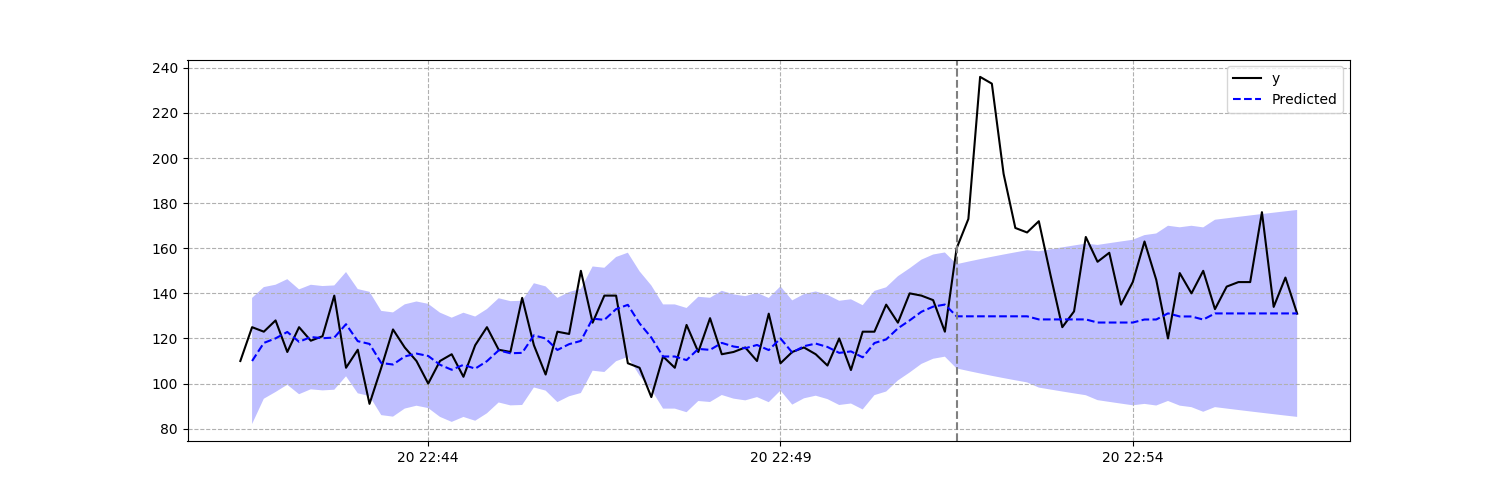

The idea is to used the predictions of the fitted model (depicted in blue) as a reference to what probably would had been observed with no intervention taking place.

Bayesian Structural Time Series models can be expressed by the following equations:

<center>$ y_t = Z^T_t\alpha_t + \beta X_t + G_t\epsilon_t$</center>
<center>$ a_{t+1} = T_t\alpha_t + H_t\eta_t$</center>
<center>$\epsilon_t \sim \mathcal{N}(0, \sigma_t^2)$</center>
<center>$\eta_t \sim \mathcal{N}(0, Q_t)$</center>

The $a$ is also referred as a "state" of the series and $y_t$ is a linear combination of the states plus a linear regression with the covariates $X$ (and the measurement noise $\epsilon$ that follows a zero-mean normal distribution).

By varying the matricex $Z$, $T$, $G$ and $H$ we can model several distinct behaviors for the time series (including the more well known such as ARMA or ARIMA).

In this package (the same is true for Google's R package), you can choose any time series model you want to fit your data (more about this later below). If no model is used as input, a local level is built by default, which means $y_t$ is expressed as:

<center>$ y_t = \mu_t + \beta X_t + \epsilon_t$</center>
<center>$ \mu_{t+1} = \mu_t +  \eta_{\mu, t}$</center>

One important aspect of the model that should be noted carefully is that the linear regression $\beta X_t$ is the core component that explains $y_t$. The local level component ($\mu_t$) is merely a random walk value which, therefore, doesn't explain anything of the observed data (as it tries to model it with randomness) so the assumption here is that we can model our observed data with the covariates and for scenarios where it's not true, the value of $\eta_{\mu, t}$ grows as to add uncertainty when making predictions.

## 2. How to Use

### 2.1 Generating Sample Data

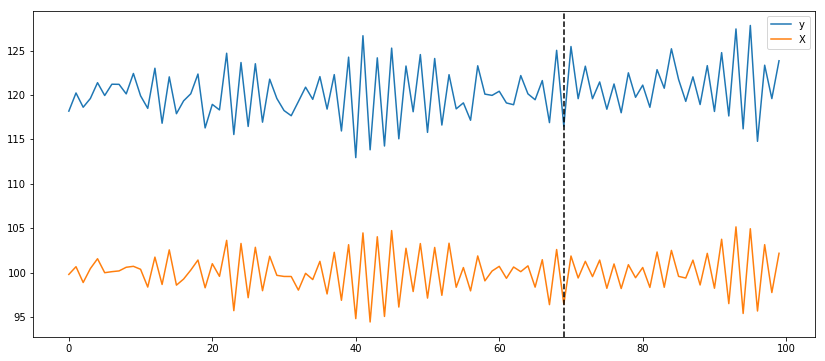

In [42]:
# This is an example presented in Google's R code.
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 1
data = pd.DataFrame({'X': X, 'y': y}, columns=['y', 'X'])

data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend();

### 2.1 Using Default Model

In [57]:
from causalimpact import CausalImpact


pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period)

In [58]:
ci.p_value

0.000999000999000999

In [61]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    121.2              3636.9
Prediction (s.d.)         120.4 (1.0)        3613.5 (30.1)
95% CI                    [118.5, 122.4]     [3554.5, 3672.4]

Absolute effect (s.d.)    0.8 (1.0)          23.4 (30.1)
95% CI                    [-1.2, 2.7]        [-35.5, 82.3]

Relative effect (s.d.)    0.6% (0.0%)        0.6% (0.0%)
95% CI                    [-1.0%, 2.3%]      [-1.0%, 2.3%]

Posterior tail-area probability p: 0.001
Posterior prob. of a causal effect: 99.90%

For more details run the command: impact.summary(output='report')


In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.arima_process import ArmaProcess
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
figsize(14, 6)

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()